# Machine Learning #

## Lo que ha venido siempre la Estadística de toda la vida, que durante los 80 se llamó Inteligencia Artificial ##

* Una serie de técnicas de análisis y manipulación de datos que sirven para obtener patrones predecibles en datos reales.

* ML Supervisado

    * Los datos vienen con atributos objetivo. Queremos modelar o simplificar los datos para entender la relación entre datos y atributos y conocer mejor el problema. 
    
    * Algoritmos de regresión y clasificación.
    
* ML No supervisado

    * Queremos encontrar estructura en nuestros datos.
    
    * Clustering, estimación de densidad...

# Scikit-learn #

* http://scikit-learn.org

* Python cuenta con una serie de módulos llamados scikits.

* Scikit-learn (sklearn) es el más conocido.

* Es un toolkit bastante completo, rápido y una referencia en ML.

* [Un buen tutorial del que he sacado parte de este ejemplo](https://github.com/jakevdp/sklearn_pycon2015)

<IPython.core.display.Javascript object>


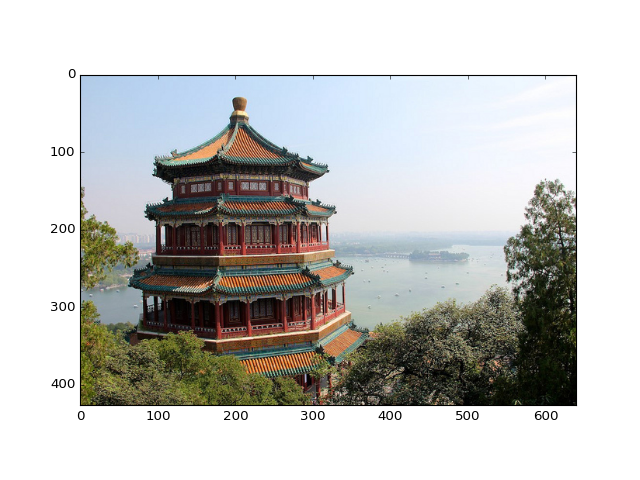

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.imshow(china)

Queremos comprimir esta imagen reduciendo el número de colores de $256^3$ a 32

In [2]:
from sklearn.cluster import KMeans
iso = china.reshape(-1,3)
iso.shape

(273280, 3)

<IPython.core.display.Javascript object>


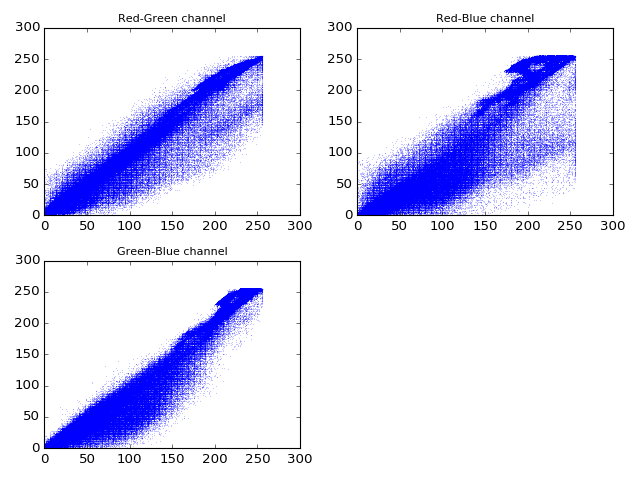

In [3]:
fig = plt.figure(2)
rg = fig.add_subplot(2,2,1)
rb = fig.add_subplot(2,2,2)
gb = fig.add_subplot(2,2,3)

rg.plot(iso[:,0], iso[:,1], 'b.', markersize=1, alpha=0.2)
rg.set_title('Red-Green channel', fontsize=10)
rb.plot(iso[:,0], iso[:,2], 'b.', markersize=1, alpha=0.2)
rb.set_title('Red-Blue channel', fontsize=10)
gb.plot(iso[:,1], iso[:,2], 'b.', markersize=1, alpha=0.2)
gb.set_title('Green-Blue channel', fontsize=10)

fig.tight_layout()

In [4]:
model = KMeans(32, n_jobs=-1)
labels = model.fit_predict(iso)
colors = model.cluster_centers_

<IPython.core.display.Javascript object>


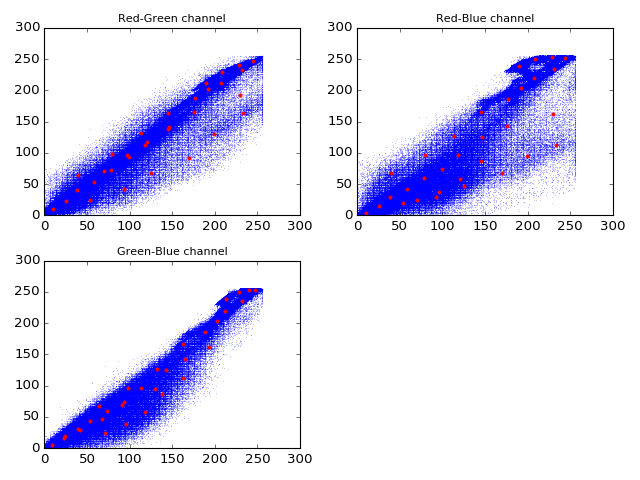

In [5]:
fig = plt.figure(3)
rg = fig.add_subplot(2,2,1)
rb = fig.add_subplot(2,2,2)
gb = fig.add_subplot(2,2,3)

rg.plot(iso[:,0], iso[:,1], 'b.', markersize=1, alpha=0.2)
rg.set_title('Red-Green channel', fontsize=10)
rb.plot(iso[:,0], iso[:,2], 'b.', markersize=1, alpha=0.2)
rb.set_title('Red-Blue channel', fontsize=10)
gb.plot(iso[:,1], iso[:,2], 'b.', markersize=1, alpha=0.2)
gb.set_title('Green-Blue channel', fontsize=10)

rg.plot(colors[:,0], colors[:,1], 'r.')
rb.plot(colors[:,0], colors[:,2], 'r.')
gb.plot(colors[:,1], colors[:,2], 'r.')

fig.tight_layout()

<IPython.core.display.Javascript object>


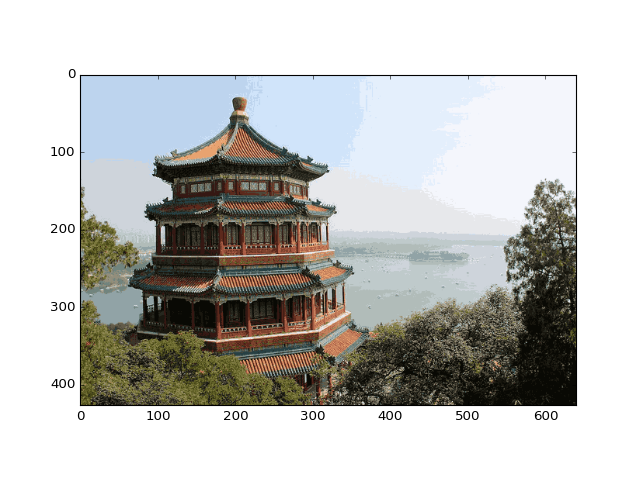

In [6]:
new_image = colors[labels].reshape(china.shape).astype(np.uint8)
fig = plt.figure(4)
ax = fig.add_subplot(1,1,1)
ax.imshow(new_image)

Volvemos al Iris, la flor preferida del Machine Learning

In [7]:
import pandas as pd
iris = pd.read_csv('data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


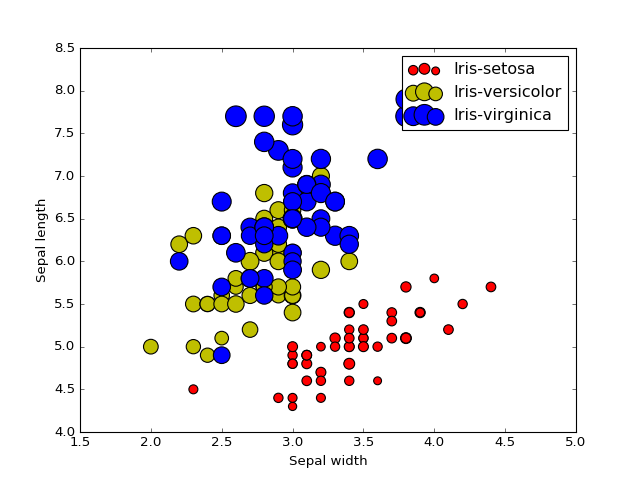

In [8]:
fig = plt.figure(5)
ax = fig.add_subplot(1,1,1)
for s, c in zip(iris.groupby('Name'), ['r', 'y', 'b']):
    s[1].plot.scatter(x='SepalWidth', y='SepalLength', c=c, s=50*s[1]['PetalLength'], ax=ax, label=s[0])
    
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')

In [9]:
from sklearn.decomposition import PCA
data = np.vstack((iris.SepalLength.as_matrix(),
                  iris.SepalWidth.as_matrix(),
                  iris.PetalLength.as_matrix(),
                  iris.PetalWidth.as_matrix())).T

pca = PCA(n_components=2)
X_r = pca.fit(data).transform(data)
print('Components', pca.components_)
print('Explained variance', pca.explained_variance_ratio_)

Components [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]
Explained variance [ 0.92461621  0.05301557]


<IPython.core.display.Javascript object>


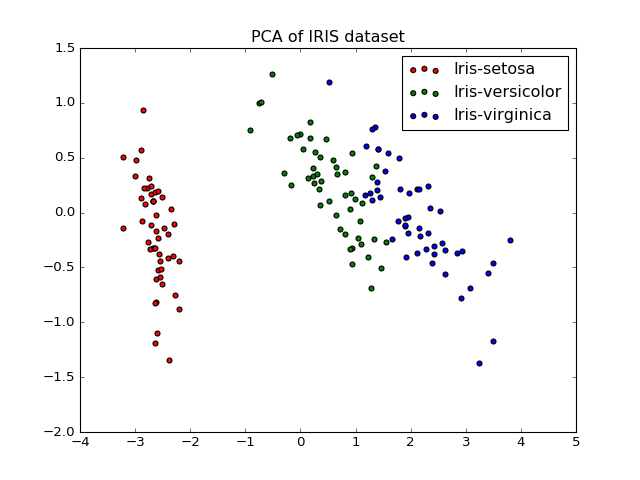

In [16]:
fig = plt.figure(6)
ax = fig.add_subplot(1,1,1)
projected = pd.DataFrame(
    {'Axis1': X_r[:,0],
     'Axis2': X_r[:,1],
     'Name': iris.Name.as_matrix()
    }
)

for (group, data), c in zip(projected.groupby('Name'), 'rgb'):
    plt.scatter(data.Axis1, data.Axis2, c=c, label=group)

plt.legend()
plt.title('PCA of IRIS dataset')


<IPython.core.display.Javascript object>


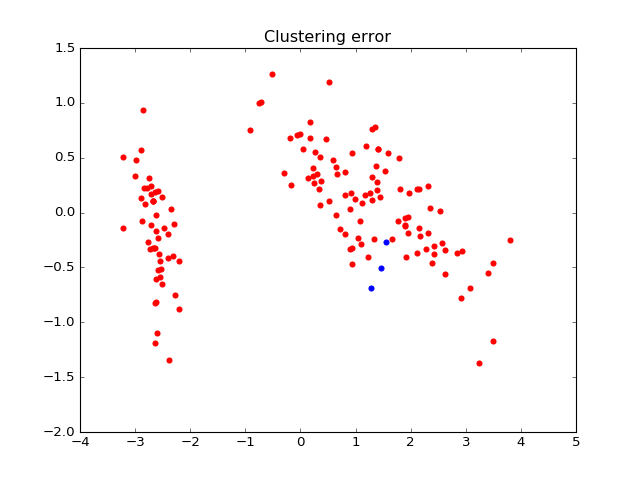

Accuracy 0.02


In [35]:
data = np.vstack((projected.Axis1.as_matrix(),
                  projected.Axis2.as_matrix())).T

model = KMeans(3, n_jobs=-1)

labels = model.fit_predict(data)
label_name_map = {
    1: 'Iris-setosa',
    2: 'Iris-versicolor',
    0: 'Iris-virginica'
                 } 
projected['Label'] = [label_name_map[l] for l in labels]

fig = plt.figure(7)
ax = fig.add_subplot(1,1,1)

right = 0
wrong = 0
for i, (ax1, ax2, name, label) in projected.iterrows():
    if name != label:
        ax.scatter(ax1, ax2, color='r')
        wrong += 1
    elif name == label:
        ax.scatter(ax1, ax2, color='b')
        right += 1
        
print('Accuracy', right/(wrong+right))
            
plt.title('Clustering error')

array([[ 0.66443351,  0.33029221],
       [-2.64084076, -0.19051995],
       [ 2.34645113, -0.27235455]])